In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
file = pd.read_csv("D:\Sushmitha\project_ds\mlops_prjct\experiments\spam.csv")

In [31]:
high_null_cols=[]

for col in file.columns:
    null_percent = file[col].isnull().mean() * 100
    print(f"Null values for {col}: {null_percent:.2f}%")

    if null_percent>90:
        high_null_cols.append(col)

print(f"cols that are having >90% null vals are {high_null_cols}")


Null values for v1: 0.00%
Null values for v2: 0.00%
Null values for Unnamed: 2: 99.10%
Null values for Unnamed: 3: 99.78%
Null values for Unnamed: 4: 99.89%
cols that are having >90% null vals are ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [32]:
file.drop(columns=high_null_cols,inplace= True)


In [33]:
file.columns=['label','message']

In [34]:
file['message']= file['message'].str.lower()

Message Length Analysis

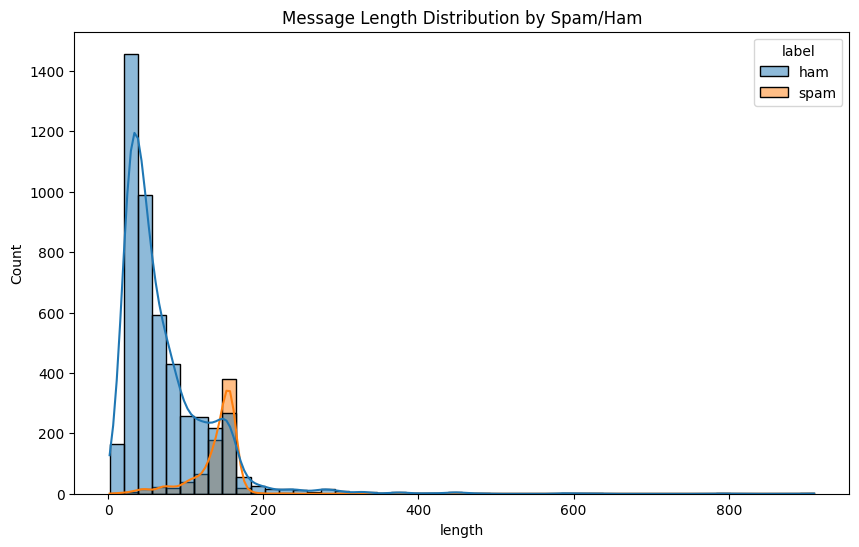

In [35]:
# Create length column
file['length'] = file['message'].apply(len)


plt.figure(figsize=(10,6))
sns.histplot(data=file, x='length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Spam/Ham')
plt.show()



In [36]:
# Average length by class
file.groupby('label')['length'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


Most Frequent Messages


In [37]:
# Top 5 repeated messages (all)
top_messages = (file['message']
               .value_counts()
               .rename_axis(['message'])
               .reset_index(name='counts')
               .head(5))
print("Top 5 repeated messages:\n", top_messages)

# Top spam-specific messages
top_spam = (file[file['label']=='spam']['message']
           .value_counts()
           .rename_axis(['message'])
           .reset_index(name='counts')
           .head(5))
print("\nTop 5 spam messages:\n", top_spam)

Top 5 repeated messages:
                                              message  counts
0                             sorry, i'll call later      30
1  i cant pick the phone right now. pls send a me...      12
2                                              ok...      10
3  say this slowly.? god,i love you &amp; i need ...       4
4                                               okie       4

Top 5 spam messages:
                                              message  counts
0  please call our customer service representativ...       4
1  camera - you are awarded a sipix digital camer...       3
2  hmv bonus special 500 pounds of genuine hmv vo...       3
3  free for 1st week! no1 nokia tone 4 ur mob eve...       3
4  loan for any purpose å£500 - å£75,000. homeown...       3


Word Frequency Analysis


In [38]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def get_top_words(df, label, n=20):
    words = ' '.join(df[df['label']==label]['message']).lower().split()
    words = [w for w in words if w not in stopwords.words('english') and w.isalpha()]
    return Counter(words).most_common(n)


top_ham = get_top_words(file, 'ham')
top_spam = get_top_words(file, 'spam')
print("Top 20 Ham Words:", top_ham)
print("Top 20 Spam Words:", top_spam)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sushmitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 Ham Words: [('u', 874), ('get', 293), ('go', 235), ('ur', 235), ('got', 227), ('like', 221), ('call', 215), ('come', 215), ('know', 208), ('good', 187), ('going', 157), ('ok', 156), ('want', 153), ('time', 153), ('love', 149), ('need', 147), ('still', 144), ('one', 141), ('n', 134), ('r', 131)]
Top 20 Spam Words: [('call', 342), ('free', 180), ('ur', 144), ('txt', 136), ('u', 117), ('text', 112), ('mobile', 109), ('claim', 106), ('reply', 101), ('stop', 89), ('get', 82), ('new', 69), ('send', 65), ('nokia', 64), ('win', 58), ('prize', 58), ('cash', 56), ('contact', 56), ('please', 52), ('service', 48)]


In [39]:
ham_words, ham_counts = zip(*top_ham)
spam_words, spam_counts = zip(*top_spam)

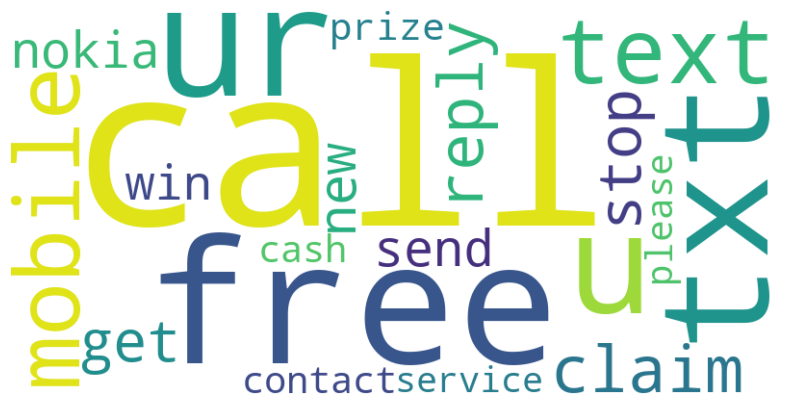

In [40]:
from wordcloud import WordCloud

def generate_wordcloud(word_counts):
    word_dict = dict(word_counts)
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_dict)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(top_spam)

C:\Users\sushmitha\AppData\Local\Temp\ipykernel_21096\3714702768.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  file[col_name] = file['message'].str.contains(pattern, regex=True)
C:\Users\sushmitha\AppData\Local\Temp\ipykernel_21096\3714702768.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  file[col_name] = file['message'].str.contains(pattern, regex=True)
C:\Users\sushmitha\AppData\Local\Temp\ipykernel_21096\3714702768.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  file[col_name] = file['message'].str.contains(pattern, regex=True)
C:\Users\sushmitha\AppData\Local\Temp\ipykernel_21096\3714702768.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get th

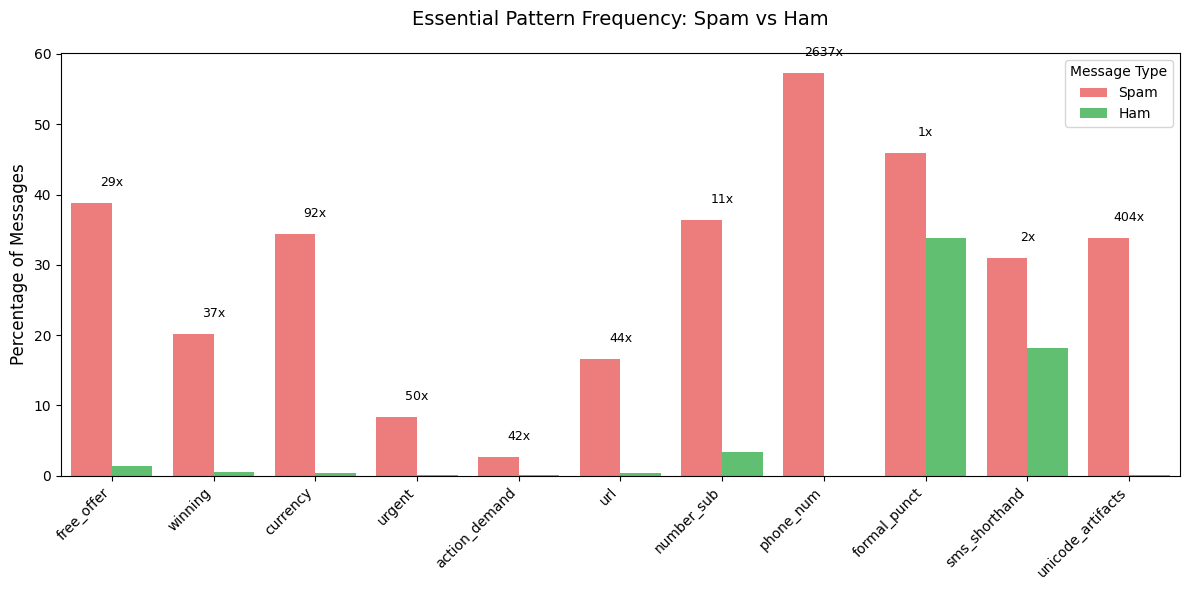

In [41]:
# Ensure these imports are at the top of your notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

essential_patterns = {
    # Financial
    'free_offer': r'\b(free|complimentary|prize|reward|bonus|gift)\b',
    'winning': r'\b(win|won|winner|claim your)\b',
    'currency': r'£|\$|€|¥|₹',
    
    # Urgency
    'urgent': r'\b(urgent|immediate|ASAP|right away)\b',
    'action_demand': r'\b(call now|click here|reply now|act fast)\b',
    
    # Technical
    'url': r'http|www|\.com|\.net|bit\.ly',
    'number_sub': r'\b([a-z]\d|\d[a-z])[a-z0-9]*\b',
    'phone_num': r'(\+\d{1,3}[-\.\s]?)?\d{3,}[-\.\s]?\d{3,}[-\.\s]?\d{4}',
    
    # New patterns
    'formal_punct': r'[,;:"]',
    

    
    'sms_shorthand': r'\b(u|ur|r|buz|tomo|sch)\b',
    'unicode_artifacts': r'å£|Û_|ÌÏ',  # Catch encoding artifacts
    
}

# First create pattern detection columns if they don't exist
for name, pattern in essential_patterns.items():
    col_name = f'pat_{name}'
    if col_name not in file.columns:
        file[col_name] = file['message'].str.contains(pattern, regex=True)

# Prepare data
pattern_stats = []
for name in essential_patterns:
    spam_pct = file[file['label']=='spam'][f'pat_{name}'].mean() * 100
    ham_pct = file[file['label']=='ham'][f'pat_{name}'].mean() * 100
    pattern_stats.append([name, spam_pct, ham_pct])

df = pd.DataFrame(pattern_stats, columns=['Pattern', 'Spam', 'Ham'])
df['Ratio'] = df['Spam'] / (df['Ham'] + 0.001)  # Avoid division by zero

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Pattern', y='value', hue='variable', 
                 data=pd.melt(df, id_vars=['Pattern', 'Ratio'], value_vars=['Spam', 'Ham']),
                 palette={'Spam': '#ff6b6b', 'Ham': '#51cf66'})
plt.title('Essential Pattern Frequency: Spam vs Ham', pad=20, fontsize=14)
plt.ylabel('Percentage of Messages', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Message Type', frameon=True)

# Add ratio annotations
for i, (_, row) in enumerate(df.iterrows()):
    ax.text(i, max(row['Spam'], row['Ham']) + 2, 
            f"{row['Ratio']:.0f}x", 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Inspecting what unnecessary elements (like numbers, special characters, or other noise) exist in text data

In [42]:
sample_text = file['message'].sample(10).tolist()
for text in sample_text:
    print('Original : ',text)
    print('contains numbers: ',any(char.isdigit() for char in text))

    punc_in_text = [char for char in text if char in string.punctuation]
    print(f"punctuation/symbols found: {list(set(punc_in_text))}")
    

    # Check for extra whitespace (tabs, newlines, etc.)
    print("Has extra whitespace:", bool(re.search(r'\s{2,}|\t|\n', text)))
    
    # Check for emails/URLs
    print("Has email:", bool(re.search(r'\S+@\S+', text)))
    print("Has URL:", bool(re.search(r'http[s]?://\S+|www\.\S+', text)))
    
    # Check for non-ASCII (emojis, special Unicode)
    non_ascii = [char for char in text if ord(char) > 127]
    print(f"Non-ASCII characters: {non_ascii if non_ascii else None}")
    
    print("----")

Original :  what is your account number?
contains numbers:  False
punctuation/symbols found: ['?']
Has extra whitespace: False
Has email: False
Has URL: False
Non-ASCII characters: None
----
Original :  i sent lanre fakeye's eckankar details to the mail box
contains numbers:  False
punctuation/symbols found: ["'"]
Has extra whitespace: False
Has email: False
Has URL: False
Non-ASCII characters: None
----
Original :  hey we can go jazz power yoga hip hop kb and yogasana 
contains numbers:  False
punctuation/symbols found: []
Has extra whitespace: False
Has email: False
Has URL: False
Non-ASCII characters: None
----
Original :  hey you still want to go for yogasana? coz if we end at cine then can go bathe and hav the steam bath
contains numbers:  False
punctuation/symbols found: ['?']
Has extra whitespace: False
Has email: False
Has URL: False
Non-ASCII characters: None
----
Original :  wow so healthy. old airport rd lor. cant thk of anything else. but i'll b bathing my dog later.
contai

Preprocessing

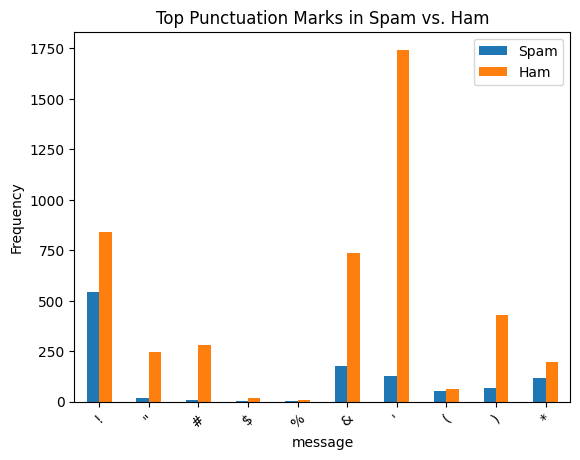

In [43]:
import string

# Count punctuation frequency per class
spam_punct = file[file['label'] == 'spam']['message'].apply(
    lambda x: [char for char in x if char in string.punctuation]
).explode().value_counts()

ham_punct = file[file['label'] == 'ham']['message'].apply(
    lambda x: [char for char in x if char in string.punctuation]
).explode().value_counts()

# Plot top spam vs. ham punctuation
pd.DataFrame({'Spam': spam_punct, 'Ham': ham_punct}).fillna(0).head(10).plot.bar()
plt.title("Top Punctuation Marks in Spam vs. Ham")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [44]:

class SMSCleaner:
    def __init__(self):
        self._compile_patterns()
        
    def _compile_patterns(self):
        """Pre-compile all regex patterns for efficiency"""
        self.replacements = [
            (re.compile(r'[\+\(]?\d[\d\-\(\) ]{7,}\d'), ' PHONENUM '),
            (re.compile(r'http[s]?://\S+|www\.\S+|bit\.ly/\S+'), ' URL '),
            (re.compile(r'\S+@\S+'), ' EMAIL '),
            (re.compile(r'£|\$|€|¥|₹'), ' CURRENCY '),
            (re.compile(r'\b\d+\b'), ' NUMBER '),
            # In your cleaning pipeline:
            (re.compile(r'[!?]{2,}'), ' REPEAT_PUNC '),  # Replace "!!!" with a token
            (re.compile(r'[$£€]{2,}'), ' REPEAT_CURRENCY '),
            (re.compile(r'[!?]+'), ' '),  # Keep single ! or ?
            (re.compile(r'[^\w\s!?\']'), ' '),
        ]
        
        self.abbreviations = {
            re.compile(r'\bu\b'): 'you',
            re.compile(r'\bur\b'): 'your',
            re.compile(r'\br\b'): 'are',
            re.compile(r'\b4\b'): 'for',
            re.compile(r'\b2\b'): 'to',
            re.compile(r'\bgr8\b'): 'great',
            re.compile(r'\bneva\b'): 'never',
            re.compile(r'\bc u\b'): 'see you',
            re.compile(r'\bthx\b'): 'thanks',
            re.compile(r'\bpls\b'): 'please'
        }

    def normalize_text(self, text):
        """Handle unicode and case normalization"""
        if not isinstance(text, str):
            return ""
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii').lower()

    def clean_text(self, text):
        """Main cleaning pipeline"""
        text = self.normalize_text(text)
        
        # Apply all replacements
        for pattern, replacement in self.replacements:
            text = pattern.sub(replacement, text)
            
        # Expand abbreviations
        for pattern, replacement in self.abbreviations.items():
            text = pattern.sub(replacement, text)
            
        # Final cleanup
        return re.sub(r'\s+', ' ', text).strip()

def batch_clean_series(text_series, batch_size=1000):
    """Clean pandas Series with progress tracking"""
    cleaner = SMSCleaner()
    cleaned = []
    
    with tqdm(total=len(text_series), desc="Cleaning texts") as pbar:
        for i in range(0, len(text_series), batch_size):
            batch = text_series.iloc[i:i+batch_size]
            cleaned_batch = [cleaner.clean_text(t) for t in batch]
            cleaned.extend(cleaned_batch)
            pbar.update(len(batch))
    
    return pd.Series(cleaned, index=text_series.index)


file['cleaned_message'] = batch_clean_series(file['message'])
    
print("\nCleaned message examples:")
print(file['cleaned_message'].head(3))


Cleaning texts: 100%|██████████| 5572/5572 [00:00<00:00, 11730.43it/s]


Cleaned message examples:
0    go until jurong point crazy available only in ...
1                            ok lar joking wif you oni
2    free entry in NUMBER a wkly comp to win fa cup...
Name: cleaned_message, dtype: object


In [55]:
file['cleaned_message'].sample(10).tolist()

['private your NUMBER account statement for PHONENUM shows NUMBER un redeemed s i m points call PHONENUM identifier code NUMBER expires NUMBER NUMBER NUMBER',
 "i think we're going to finn's now come",
 'haha yeah NUMBER oz is kind of a shitload',
 'i feel like a dick because i keep sleeping through your texts and facebook messages sup you in town',
 'hey loverboy i love you REPEAT_PUNC i had to tell i look at your picture and ache to feel you between my legs fuck i want you i need you i crave you',
 'aiya we discuss later lar pick i_ up at NUMBER is it',
 "i wont so wat's wit the guys",
 'great news call freefone PHONENUM to claim your guaranteed a1000 cash or a2000 gift speak to a live operator now',
 "haha can but i'm having dinner with my cousin",
 'aathi where are you dear']

In [ ]:

# TF-IDF with n-grams to capture phrases
tfidf = TfidfVectorizer(
    max_features=1000,          # Limit vocabulary size
    ngram_range=(1, 2),        # Include unigrams + bigrams
    stop_words='english'       # Optional: remove common words
)

# Transform cleaned messages
X_text = tfidf.fit_transform(file['cleaned_message'])
print(f"TF-IDF shape: {X_text.shape}")  # (n_messages, n_features)


TF-IDF shape: (5572, 5000)


In [49]:
def extract_features(df):
    features = pd.DataFrame()
    text_series = df['cleaned_message']

    # Length features
    features['char_count'] = text_series.str.len()
    features['word_count'] = text_series.str.split().apply(len)
    features['avg_word_length'] = features['char_count'] / features['word_count'].replace(0, 1)

    # Normalized token counts (from your SMSCleaner)
    features['count_PHONENUM'] = text_series.str.count(r'\bPHONENUM\b')
    features['count_URL'] = text_series.str.count(r'\bURL\b')
    features['count_EMAIL'] = text_series.str.count(r'\bEMAIL\b')
    features['count_CURRENCY'] = text_series.str.count(r'\bCURRENCY\b')
    features['count_NUMBER'] = text_series.str.count(r'\bNUMBER\b')

    # Repeated punctuation (already replaced with token REPEAT_PUNC)
    features['count_REPEAT_PUNC'] = text_series.str.count(r'\bREPEAT_PUNC\b')
    features['count_REPEAT_CURRENCY'] = text_series.str.count(r'\bREPEAT_CURRENCY\b')


    # Stopword ratio (low in spam)
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    stopwords = ENGLISH_STOP_WORDS
    features['stopword_ratio'] = text_series.apply(
        lambda x: sum(1 for w in x.split() if w in stopwords) / len(x.split()) if len(x.split()) > 0 else 0
    )

    # Special features
    features['unique_word_ratio'] = text_series.apply(
        lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0
    )
    
    return features


In [50]:
# Apply to cleaned text
X_engineered = extract_features(file)

# Normalize features
from sklearn.preprocessing import StandardScaler
X_engineered_scaled = StandardScaler().fit_transform(X_engineered)

# Combine with TF-IDF
from scipy.sparse import hstack
X_combined = hstack([X_text, X_engineered_scaled])


In [51]:
X_combined

<5572x5012 sparse matrix of type '<class 'numpy.float64'>'
	with 109789 stored elements in COOrdinate format>

In [53]:
from scipy.sparse import csr_matrix

# Convert to CSR format first
X_combined_csr = csr_matrix(X_combined)

# Now safely slice and convert to dense
X_combined_df = pd.DataFrame(X_combined_csr[:5].toarray(), columns=all_feature_names)

# View
print(X_combined_df.head())


   0776xxxxxxx  0776xxxxxxx ve  07xxxxxxxxx  07xxxxxxxxx won  1000s  10am  \
0          0.0             0.0          0.0              0.0    0.0   0.0   
1          0.0             0.0          0.0              0.0    0.0   0.0   
2          0.0             0.0          0.0              0.0    0.0   0.0   
3          0.0             0.0          0.0              0.0    0.0   0.0   
4          0.0             0.0          0.0              0.0    0.0   0.0   

   10am 7pm  10k  10p  10p min  ...  avg_word_length  count_PHONENUM  \
0       0.0  0.0  0.0      0.0  ...         0.275085       -0.283835   
1       0.0  0.0  0.0      0.0  ...        -1.003633       -0.283835   
2       0.0  0.0  0.0      0.0  ...         0.138080        3.024802   
3       0.0  0.0  0.0      0.0  ...        -0.858324       -0.283835   
4       0.0  0.0  0.0      0.0  ...        -0.388865       -0.283835   

   count_URL  count_EMAIL  count_CURRENCY  count_NUMBER  count_REPEAT_PUNC  \
0  -0.139257    -0.060019 